# Лабораторная работа №6

### Построим таблицу значений функции согласно варианту:

In [1]:
import pandas as pd
data = [[0.847, 1.546, 1.834, 2.647, 2.910, 4.0], [-1.104, 1.042, 0.029, -0.344, -0.449,0.5]]
col = []
for i in range (6):
    col.append(i)
pd.DataFrame(data, columns=col, index = ['X', 'Y'])

,0,1,2,3,4,5
X,0.847,1.546,1.834,2.647,2.910,4.0
Y,-1.104,1.042,0.029,-0.344,-0.449,0.5


### 1. Построить интерполяционный многочлен Лагранжа.  Вычислить L4 (x1+x2). Построить график многочлена Лагранжа.

Многочлен Лагранжа:
 1.42484938806099*x**5 - 17.4537182276853*x**4 + 81.9628476046725*x**3 - 183.127689183233*x**2 + 191.94288005512*x - 73.7446470748188


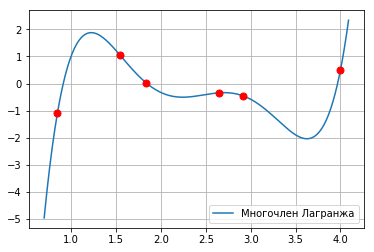

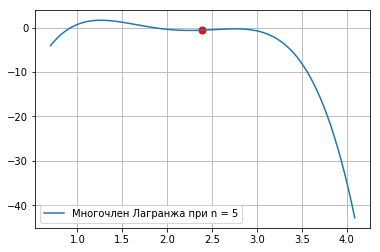

L5(x1 + x2) =  -0.600272131762771


In [3]:
import sympy
import numpy
import pylab
list_x = [0.847, 1.546, 1.834, 2.647, 2.910, 4.0]
f = {list_x[0]: -1.104, list_x[1]: 1.042, list_x[2]: 0.029, 
     list_x[3]: -0.344, list_x[4]: -0.449, list_x[5]: 0.5}

def basis_polynome(x, i, n):
    p = 1
    for k in range(n):
        if k != i:
            p *= (x - list_x[k])/(list_x[i] - list_x[k])        
    return p
    
def lagrange_polynome(x, n):
    lagrange = 0
    for i in range(n):
        lagrange += basis_polynome(x, i, n)*f[list_x[i]]
    return sympy.expand(lagrange)
        

def show_polynome(polynome, text, n, dots):
    xmin = 0.7
    xmax = 4.1
    
    dx = 0.01
    xlist = numpy.arange(xmin, xmax, dx)
    ylist = [polynome(p, n) for p in xlist]
    pylab.plot (xlist, ylist, label = text)
    if dots:
        for i in range(n):
            pylab.plot([list_x[i]], [f[list_x[i]]], marker='o', markersize=7, color="red")   
    pylab.grid(True)
    pylab.legend()
    pylab.show()

n = 6
x = sympy.Symbol('x')
print("Многочлен Лагранжа:\n", lagrange_polynome(x, n))

show_polynome(lagrange_polynome, "Многочлен Лагранжа", n, True)

x = list_x[0] + list_x[1]
pylab.plot([list_x[0] + list_x[1]], [lagrange_polynome(x, 5)], marker='o', markersize=7, color="red")
show_polynome(lagrange_polynome, "Многочлен Лагранжа при n = 5", 5, False)

print("L5(x1 + x2) = ", lagrange_polynome(x, 5))

### 2. Построить таблицы конечных и разделенных разностей.

In [4]:
from scipy.special import comb

def finite_differences(n, k):
    diff = 0
    for i in range(n + 1):
        diff += (-1) ** (n - i) * comb(n, i) * f[list_x[k + i]]
    return diff
    
data = []
for i in range(n):
    data.append([list_x[i], f[list_x[i]]])
    
for i in range(0, n):
    for j in range (1, n):
        if i >= n - j:
            data[i].append("-")
        else:    
            data[i].append(finite_differences(j, i))  
    
print("Таблица конечных разностей:")
pd.DataFrame(data, columns=["Xk", "Yk", "1-го порядка", "2-го порядка", "3-го порядка", "4-го порядка","5-го порядка" ])

Таблица конечных разностей:


,Xk,Yk,1-го порядка,2-го порядка,3-го порядка,4-го порядка,5-го порядка
0,0.847,-1.104,2.146,-3.159,3.799,-4.171,5.329
1,1.546,1.042,-1.013,0.64,-0.372,1.158,-
2,1.834,0.029,-0.373,0.268,0.786,-,-
3,2.647,-0.344,-0.105,1.054,-,-,-
4,2.910,-0.449,0.949,-,-,-,-
5,4.000,0.500,-,-,-,-,-


In [5]:
def divided_differences(x):
    if len(x) == 2:
        return (f[x[1]] - f[x[0]]) / (x[1] - x[0])
    return (divided_differences(x[1:]) - divided_differences(x[:-1]))/(x[-1] - x[0])

def divided_differences(x):
    if len(x) == 2:
        return (f[x[1]] - f[x[0]]) / (x[1] - x[0])
    return (divided_differences(x[1:]) - divided_differences(x[:-1])) / (x[-1] - x[0])

divided_diffs = []

for j in range(0, n):
    d = []
    for i in range(j + 1, n):
        d.append(divided_differences(list_x[j:i + 1]))
    divided_diffs.append(d)
    
data = []
for i in range(n):
    data.append([list_x[i], f[list_x[i]]])

for i in range(0, n):
    for j in range(1, n):
        if i >= n - j:
            data[i].append("-")
        else:
            data[i].append(divided_diffs[i][j - 1])

pd.DataFrame(data, columns=["Xk", "Yk", "1-го порядка", "2-го порядка", "3-го порядка", "4-го порядка", "5-го порядка"])

,Xk,Yk,1-го порядка,2-го порядка,3-го порядка,4-го порядка,5-го порядка
0,0.847,-1.104,3.0701,-6.67423,5.25123,-3.51299,1.42485
1,1.546,1.042,-3.51736,2.77799,-1.99607,0.979558,-
2,1.834,0.029,-0.458795,0.0553486,0.407765,-,-
3,2.647,-0.344,-0.39924,0.938567,-,-,-
4,2.910,-0.449,0.870642,-,-,-,-
5,4.000,0.500,-,-,-,-,-


### 3. Построить полином Ньютона и вычислить значение N4 (x1+x2). Построить график многочлена Ньютона.

Интерполяционный многочлен Ньютона:
 1.42484938806099*x**5 - 17.4537182276853*x**4 + 81.9628476046724*x**3 - 183.127689183233*x**2 + 191.94288005512*x - 73.7446470748187


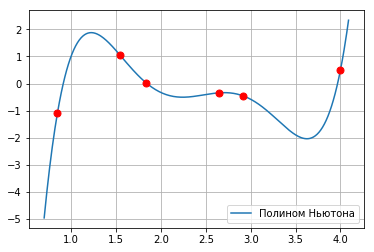

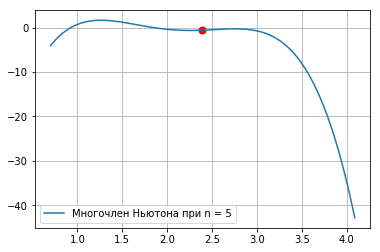

L5(x1 + x2) =  -0.600272131762772


In [6]:
def newtone_polynome(x, n):
    polynome = f[list_x[0]]
    for i in range(1, n):
        factor = 1
        for j in range(0, i):
            factor *= (x - list_x[j])
        polynome += divided_differences(list_x[0:i + 1]) * factor    
    return sympy.expand(polynome)

n = 6
x = sympy.Symbol('x')
print("Интерполяционный многочлен Ньютона:\n", newtone_polynome(x, n))

show_polynome(newtone_polynome, "Полином Ньютона", n, True)

x = list_x[0] + list_x[1]
pylab.plot([list_x[0] + list_x[1]], [newtone_polynome(x, 5)], marker='o', markersize=7, color="red")
show_polynome(newtone_polynome, "Многочлен Ньютона при n = 5", 5, False)

print("L5(x1 + x2) = ", newtone_polynome(x, 5))

### 4. Построить интерполяционные сплайны кусочно-линейный и кусочно-квадратичный. Построить графики сплайнов.

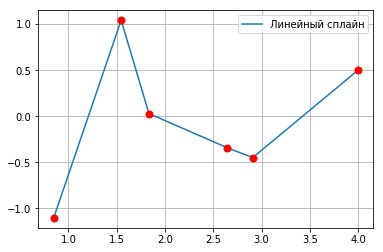

,Диапазон,Сплайн
0,x = 0.847..1.546,3.0701*x - 3.70437
1,x = 1.546..1.834,-3.51736*x + 6.47984
2,x = 1.834..2.647,-0.45879*x + 0.87042
3,x = 2.647..2.91,-0.39924*x + 0.71279
4,x = 2.91..4.0,0.87064*x - 2.98256


In [7]:
def linear_function(x1, x2, x):
    a = round((f[x2] - f[x1]) / (x2 - x1), 5)
    b = round(f[x1] - a * x1, 5)
    return a * x + b

def linear_spline(x, n):
    for i in range(n - 1):
        if x >= list_x[i] and x <= list_x[i + 1]:
            return linear_function(list_x[i] , list_x[i + 1], x)
    return None    
        
show_polynome(linear_spline, "Линейный сплайн", n, True)

x = sympy.Symbol('x')
data = []
for i in range(n - 1):
     data.append(["x = {0}..{1}".format(list_x[i], list_x[i + 1]),
                  linear_function(list_x[i] , list_x[i + 1], x)])
return pd.DataFrame(data, columns=["Диапазон", "Сплайн"])

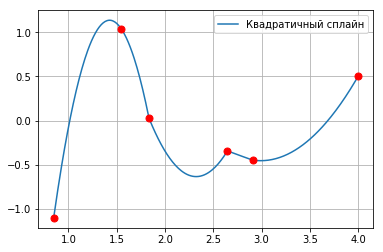

,Диапазон,Сплайн
0,x = 0.847..1.546,-6.67423*x**2 + 19.04153*x - 12.44403
1,x = 1.546..1.834,-6.67423*x**2 + 19.04153*x - 12.44403
2,x = 1.834..2.647,2.77799*x**2 - 12.90697*x + 14.35645
3,x = 2.647..2.91,0.05535*x**2 - 0.70682*x + 1.13913
4,x = 2.91..4.0,0.93857*x**2 - 5.61487*x + 7.94238


In [8]:
def square_function(x1, x2, x3, x):
    a = round((f[x3] - ((x3*(f[x2]-f[x1])+x2*f[x1]-x1*f[x2])/(x2 - x1)))/(x3*(x3 - x1 - x2) + x1*x2), 5)
    b = round((f[x2] - f[x1]) / (x2 - x1) - a * (x2 + x1), 5)
    c = round((x2*f[x1] - x1 * f[x2])/(x2 - x1) + a*x1*x2, 5)
    return a * x ** 2 + b * x + c

def square_spline(x, n):
    for i in range(1, n - 1):                    
        if list_x[i - 1] <= x <= list_x[i + 1]:
            return square_function(list_x[i - 1], list_x[i], list_x[i + 1], x)
    return None  
        
show_polynome(square_spline, "Квадратичный сплайн", n, True)

x = sympy.Symbol('x')
data = []
for i in range(n - 1):
    if i <= 1:
        data.append(["x = {0}..{1}".format(list_x[i], list_x[i + 1]),
                 square_function(list_x[0] , list_x[1], list_x[2], x)])
        continue
    data.append(["x = {0}..{1}".format(list_x[i], list_x[i + 1]),
                 square_function(list_x[i - 1] , list_x[i], list_x[i + 1], x)])
pd.DataFrame(data, columns=["Диапазон", "Сплайн"])

### 5. Построить кубический интерполяционный сплайн. Построить график.

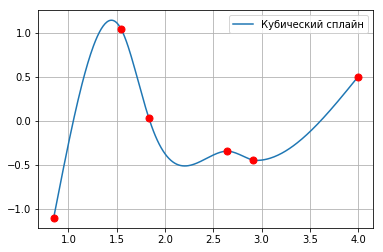

,Диапазон,Сплайн
0,x = 0.847..1.546,-5.243*x**3 + 13.32*x**2 - 5.652*x - 2.688
1,x = 1.546..1.834,20.53*x**3 - 106.2*x**2 + 179.2*x - 97.94
2,x = 1.834..2.647,-3.78*x**3 + 27.54*x**2 - 66.32*x + 52.35
3,x = 2.647..2.91,4.818*x**3 - 40.73*x**2 + 114.3*x - 106.8
4,x = 2.91..4.0,-0.406*x**3 + 4.872*x**2 - 18.14*x + 21.07


In [9]:
def calculate_h(k):
    return list_x[k] - list_x[k - 1]

def calculate_l(k):
    return (f[list_x[k]] - f[list_x[k - 1]]) / calculate_h(k)

def calculate_delta(k):
    if k == 1:
        return - (calculate_h(2) / (calculate_h(1) + calculate_h(2))) / 2
    return - calculate_h(k + 1) / (2 * calculate_h(k) + 2 * calculate_h(k + 1) + 
                                  2 * calculate_h(k) * calculate_delta(k - 1))

def calculate_lambda(k):
    if k == 1:
        return (3 / 2) * (calculate_l(2) - calculate_l(1)) / (calculate_h(1) + calculate_h(2))
    return (2 * calculate_l(k + 1) - 3 * calculate_l(k) - calculate_h(k) * calculate_lambda(k - 1)) / \
    (2 * calculate_h(k) + 2 * calculate_h(k + 1) + calculate_h(k) * calculate_delta(k - 1))

def calculate_a(k):
    return f[list_x[k]]

def calculate_c(k):   
    if k == n - 1 or k == 0:
        return 0
    return calculate_c(k + 1) * calculate_delta(k) + calculate_lambda(k)

def calculate_b(k):
    return calculate_l(k) + (2 / 3) * calculate_c(k) * calculate_h(k) + (1 / 3) * calculate_h(k) * calculate_c(k - 1)

def calculate_d(k):
    return (calculate_c(k) - calculate_c(k - 1)) / (3 * calculate_h(k))
        
def coub_function(rx, x, k):
    a = round(calculate_a(k), 3)
    b = round(calculate_b(k), 3)
    c = round(calculate_c(k), 3)
    d = round(calculate_d(k), 3)
    return sympy.N(sympy.expand(a + b * (x - rx) + c * (x - rx) ** 2 + d * (x - rx) ** 3), 4)

def coub_spline(x, n):
    k = 0
    for i in range(n - 1):
        k += 1
        if x >= list_x[i] and x <= list_x[i + 1]:
            return coub_function(list_x[i + 1], x, k)
    return None    

show_polynome(coub_spline, "Кубический сплайн", n, True)

x = sympy.Symbol('x')
data = []
k = 0
for i in range(n - 1):
    k += 1
    data.append(["x = {0}..{1}".format(list_x[i], list_x[i + 1]), coub_function(list_x[i + 1], x, k)])
pd.DataFrame(data, columns=["Диапазон", "Сплайн"])

### 6. На одном чертеже с графиком полиномов построить графики сплайнов.

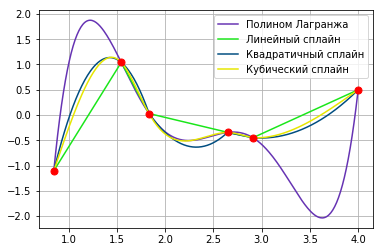

In [10]:
xmin = list_x[0]
xmax = list_x[n - 1]
    
dx = 0.01
xlist = numpy.arange(xmin, xmax, dx)
ylist = [lagrange_polynome(p, n) for p in xlist]
pylab.plot (xlist, ylist, label = "Полином Лагранжа", color = (0.4, 0.2, 0.7))
ylist = [linear_spline(p, n) for p in xlist]
pylab.plot (xlist, ylist, label = "Линейный сплайн", color = (0.1, 0.9, 0.1))
ylist = [square_spline(p, n) for p in xlist]
pylab.plot (xlist, ylist, label = "Квадратичный сплайн", color = (0, 0.3, 0.5))
ylist = [coub_spline(p, n) for p in xlist]
pylab.plot (xlist, ylist, label = "Кубический сплайн", color = (0.9, 0.9, 0))
for i in range(n):
    pylab.plot([list_x[i]], [f[list_x[i]]], marker='o', markersize=7, color="red")
pylab.grid(True)
pylab.legend()
pylab.show()